### Linear Regression with a Single Feature (or Simple Linear Regression)

#### Simple Linear Regression from scrutch 


MSE: 43.832718457725946
MSE: 2.4549278922960753
MSE: 0.4391353713649751
MSE: 0.34077549412926433
MSE: 0.33582017314149504
MSE: 0.33541596064483
MSE: 0.335234552495439
MSE: 0.33506509752768465
MSE: 0.33489731712060705
MSE: 0.33473070314608494


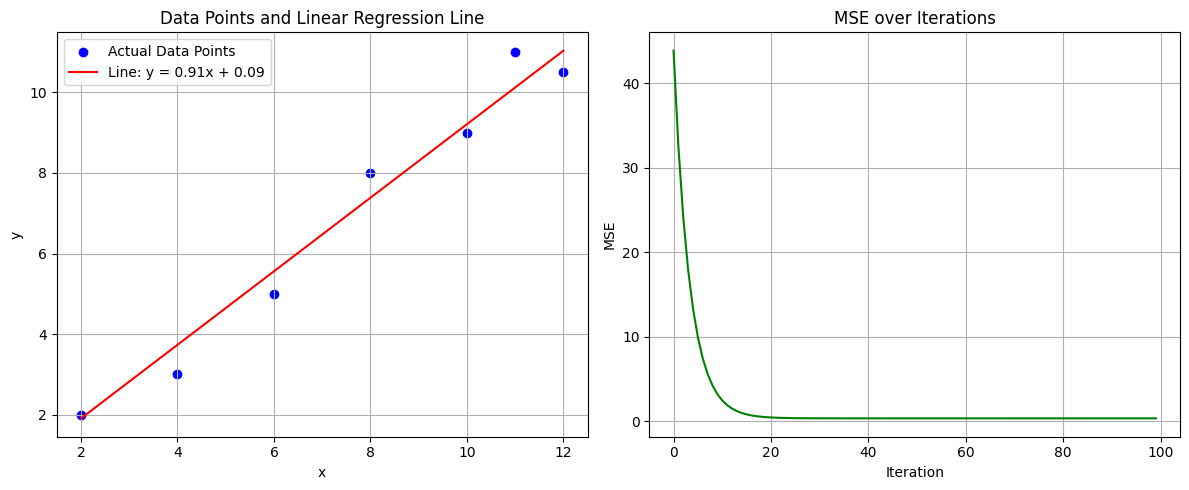

In [15]:
# y = w*x+b
import matplotlib.pyplot as plt

# Data
x = [2,4,6,8,10,11,12]
y = [2,3,5,8,9,11,10.5]

# Define a function to compute the Mean Squared Error (MSE)
def compute_mse(w, b, x, y):
    """
    Compute the Mean Squared Error (MSE) based on the formula:
    MSE = (1/n) * Î£(y_i - (w*x_i + b))^2
    where:
    - n is the number of data points
    - y_i is the actual value of the ith data point
    - x_i is the value of the predictor variable for the ith data point
    - w is the weight or coefficient of the predictor variable
    - b is the bias or y-intercept
    
    Parameters:
    - w: weight or coefficient of predictor variable x
    - b: bias or y-intercept
    - x: list or array of predictor variable values
    - y: list or array of observed outcome values
    
    Returns:
    - MSE value
    """
    # Calculate the number of data points
    n = len(x)
    # Compute the sum of squared differences between observed (y) and predicted (w*x[i] + b) values
    total_error = sum((y[i] - (w*x[i] + b))**2 for i in range(n))
    
    # Return the average of the squared differences (i.e., MSE)
    return total_error / n


# Compute gradients
def compute_gradients(w, b, x, y):
    features_x_len = len(x)
    
    # Initialize gradients
    total_gradient_w = 0
    total_gradient_b = 0
    
    # Calculate total gradient for w and b
    for i in range(features_x_len):
        predicted_y = w*x[i] + b
        difference = y[i] - predicted_y
        
        # Accumulated sum of individual gradients for each data point concerning 'w'
        total_gradient_w += x[i] * difference
        total_gradient_b += difference
    
    # Calculate the mean gradient for w and b
    # In simple words - "If I tweak the weight w a little bit, how does my error change?".

    # Calculate the average gradient with respect to w (weight/parameter) across all data points. 
    # The gradient represents the rate of change of the cost function with respect to w. 
    # The negative sign indicates the direction to adjust w to minimize the cost, 
    # the factor of 2 comes from differentiating the squared term in the Mean Squared Error,
    # and the division by features_x_len gives the average gradient across all data points.
    dw = (-2/features_x_len) * total_gradient_w
    db = (-2/features_x_len) * total_gradient_b
    
    # Print the gradients
    #print("Partial Derivative with respect to w:", dw)
    #print("Partial Derivative with respect to b:", db)
    
    return dw, db


# Gradient Descent Algorithm for linear regression
def gradient_descent(x, y, w_init, b_init, learning_rate, num_iterations):
    # Initial values for weight (w) and bias (b)
    w, b = w_init, b_init
    
    # A list to keep track of Mean Squared Error (MSE) for each iteration
    mse_history = []

    for i in range(num_iterations):
        # Compute the gradient of the loss with respect to w and b
        dw, db = compute_gradients(w, b, x, y)
        
        # Update the weight and bias using the computed gradients and learning rate
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Compute the current Mean Squared Error (MSE) after the update
        mse = compute_mse(w, b, x, y)
        
        mse_history.append(mse)
    
    return w, b, mse_history


def plot_results(x, y, w, b, mse_history):
    plt.figure(figsize=(12, 5))

    # Data Points and Regression Line
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='blue', label='Actual Data Points')
    plt.plot(x, [w*xi + b for xi in x], color='red', label=f'Line: y = {w:.2f}x + {b:.2f}')
    plt.title('Data Points and Linear Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)

    # MSE over Iterations
    plt.subplot(1, 2, 2)
    plt.plot(range(len(mse_history)), mse_history, color='green')
    plt.title('MSE over Iterations')
    plt.xlabel('Iteration')
    plt.ylabel('MSE')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Parameters
learning_rate = 0.001
num_iterations = 100
initial_w = 0
initial_b = 0

final_w, final_b, mse_history = gradient_descent(x, y, initial_w, initial_b, learning_rate, num_iterations)

for i in range(0,len(mse_history),10):
    print("MSE:",mse_history[i])
plot_results(x, y, final_w, final_b, mse_history)



# Multiple Linear Regression.

In multiple linear regression, we model the relationship between two or more predictors and the response.

MSE: 2.3822953935860056
MSE: 0.34888146371435297
MSE: 0.3486811380453666
MSE: 0.34848191860716005
MSE: 0.3482837985625298
MSE: 0.3480867711189757
MSE: 0.3478908295283931
MSE: 0.34769596708677764
MSE: 0.34750217713392717
MSE: 0.34730945305314914


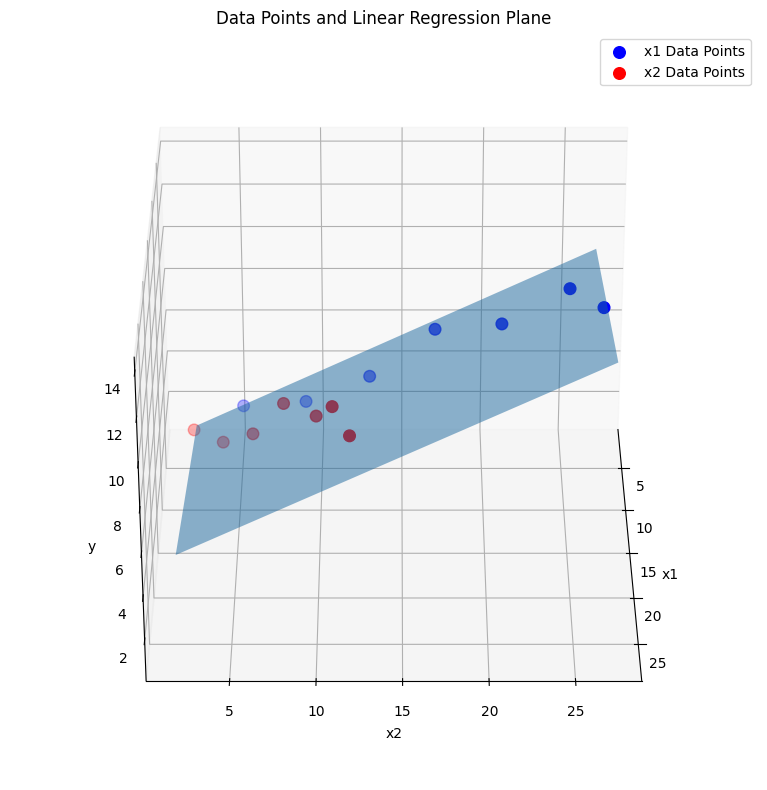

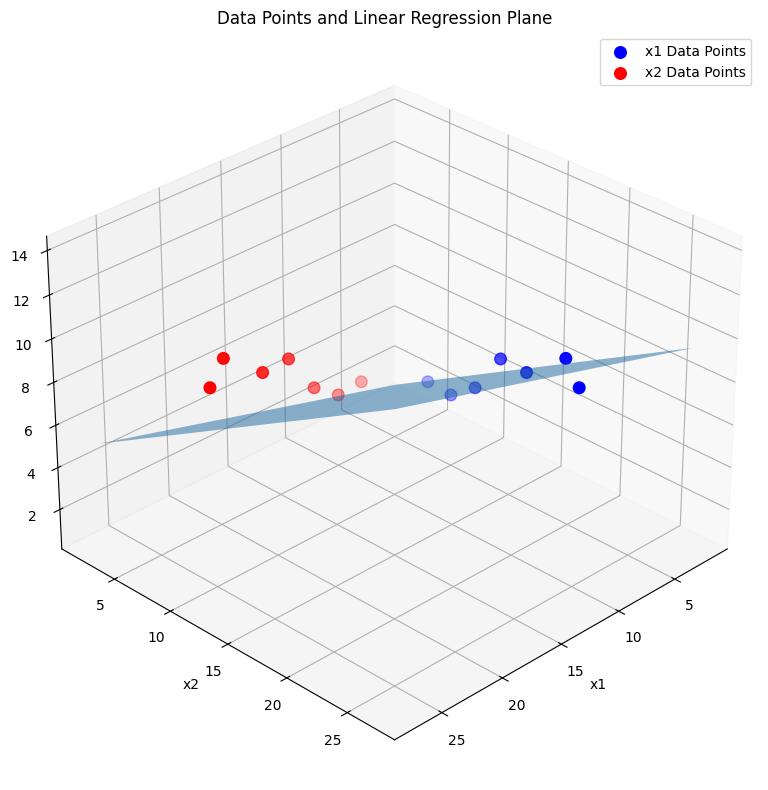

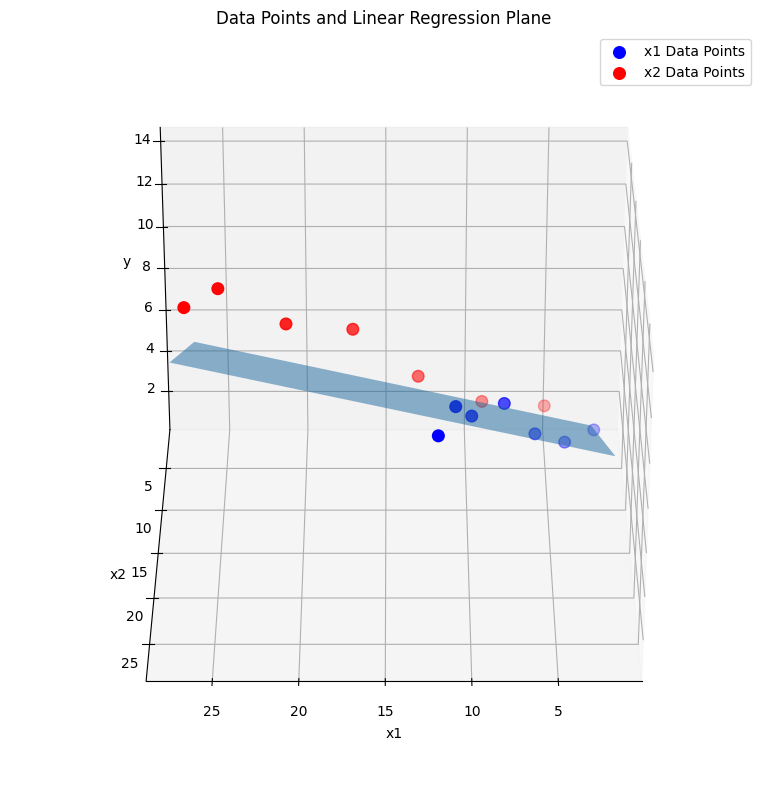

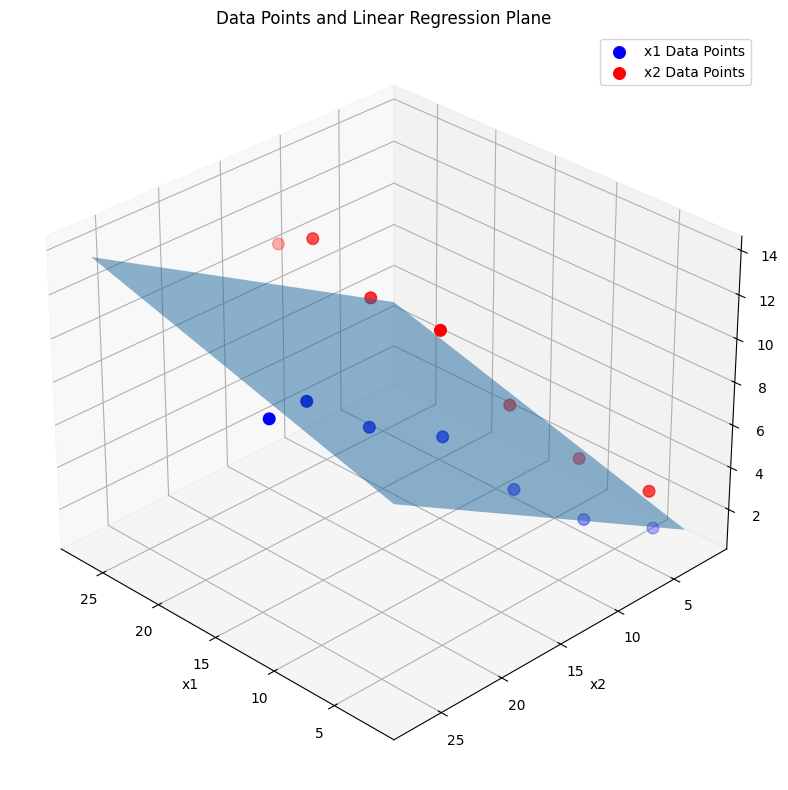

In [18]:
import matplotlib.pyplot as plt
import numpy as np
x1 = [2,4,6,8,10,11,12]
x2 = [5,9,13,17,21,25,27]

y = [2,3,5,8,9,11,10.5]

def compute_mse(w1, w2, b, x1, x2, y):
    """Compute the Mean Squared Error."""
    n = len(x1)
    total_error = sum((y[i] - (w1*x1[i] + w2*x2[i] + b))**2 for i in range(n))
    return total_error / n

# Compute gradients
def compute_gradients(w1, w2, b, x1, x2, y):
    features_len = len(y)
    
    # Initialize gradients
    total_gradient_w1 = 0
    total_gradient_w2 = 0
    total_gradient_b = 0
    
    # Calculate total gradient for w and b
    for i in range(features_len):
        # y = w1*x1 + w2*x2 + b
        predicted_y = w1*x1[i] + w2*x2[i] + b
        difference = y[i] - predicted_y
        
        # Accumulated sum of individual gradients for each data point concerning 'w'
        total_gradient_w1 += x1[i] * difference
        total_gradient_w2 += x2[i] * difference
        total_gradient_b += difference
    
    # Calculate the mean gradient for w and b
    # In simple words - "If I tweak the weight w a little bit, how does my error change?".

    # Calculate the average gradient with respect to w (weight/parameter) across all data points. 
    # The gradient represents the rate of change of the cost function with respect to w. 
    # The negative sign indicates the direction to adjust w to minimize the cost, 
    # the factor of 2 comes from differentiating the squared term in the Mean Squared Error,
    # and the division by features_x_len gives the average gradient across all data points.
        dw1 = (-2/features_len) * total_gradient_w1
        dw2 = (-2/features_len) * total_gradient_w2
        db = (-2/features_len) * total_gradient_b
    
    # Print the gradients
    return dw1, dw2, db


# Gradient Descent Algorithm
def gradient_descent(x1, x2, y, w1_init, w2_init, b_init, learning_rate, num_iterations):
    w1, w2, b = w1_init, w2_init, b_init
    mse_history = []
    
    for i in range(num_iterations):
        dw1, dw2, db = compute_gradients(w1, w2, b, x1, x2, y)
        w1 -= learning_rate * dw1
        w2 -= learning_rate * dw2
        b -= learning_rate * db
        mse = compute_mse(w1, w2, b, x1, x2, y)
        mse_history.append(mse)
    
    return w1, w2, b, mse_history

def plot_results(x1, x2, y, w1, w2, b, elev=30, azim=30):
    fig = plt.figure(figsize=(10, 8))

    # Data Points and Regression Plane in 3D
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    ax1.scatter(x1, x2, y, color='blue', label='x1 Data Points', s=70) # s is the marker size
    ax1.scatter(x2, x1, y, color='red', label='x2 Data Points', s=70)
    
    # Create a meshgrid for the plane
    x_range = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 10)
    y_range = np.linspace(min(min(x1), min(x2)), max(max(x1), max(x2)), 10)
    X1, X2 = np.meshgrid(x_range, y_range)
    Y = w1*X1 + w2*X2 + b
    
    ax1.plot_surface(X1, X2, Y, alpha=0.5, rstride=100, cstride=100)
    ax1.set_title('Data Points and Linear Regression Plane')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.view_init(elev=elev, azim=azim)  # Set the view angle
    ax1.legend()

    plt.tight_layout()
    plt.show()



# Parameters
learning_rate = 0.001
num_iterations = 100

initial_w1 = 0
initial_w2 = 0
initial_b = 0

final_w1, final_w2, final_b, mse_history = gradient_descent(x1, x2, y, initial_w1, initial_w2, initial_b, learning_rate, num_iterations)
for i in range(0,len(mse_history),10):
    print("MSE:",mse_history[i])

angles = [(30, 0), (30, 45), (30, 90), (30, 135)]
for angle in angles:    
    plot_results(x1, x2, y, final_w1, final_w2, final_b, angle[0], angle[1])

# Multiple linear regression based on matrix to vector multilication 

MSE: 163.54665000000003
MSE: 2.9372697045668086
MSE: 2.924287333244341
MSE: 2.9204785607433266
MSE: 2.916702686372718
MSE: 2.9129589145940473
MSE: 2.9092469724410512
MSE: 2.9055665892975897
MSE: 2.9019174968482995
MSE: 2.898299429059053


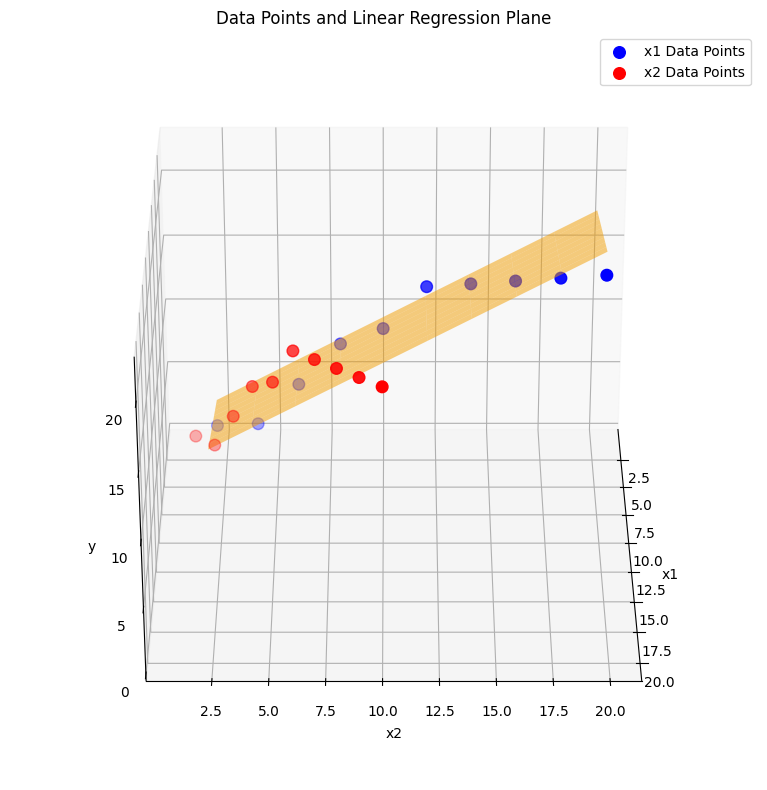

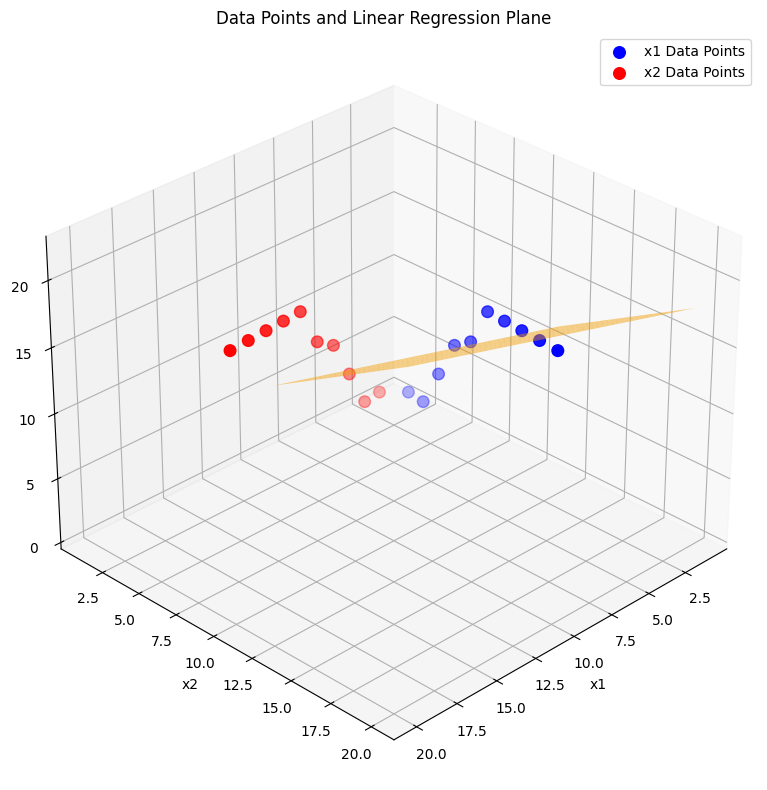

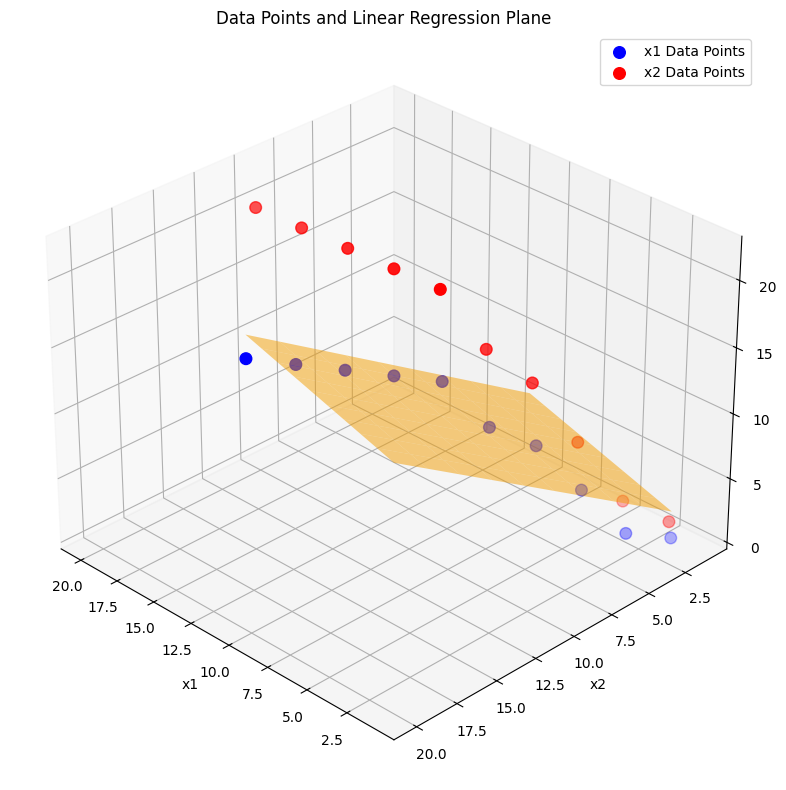

In [19]:
import matplotlib.pyplot as plt
import numpy as np

#2D array (Matrix) with 10 rows and 2 columns
x_features_matrix = np.array([[1, 2],
                              [2, 4],
                              [3, 6],
                              [4, 8],
                              [5, 10],
                              [6, 12],
                              [7, 14], 
                              [8, 16], 
                              [9, 18],  
                              [10, 20]])

y = np.array([1, 2, 6, 10, 12, 16, 17, 18, 19, 20])

def compute_mse(w_vector, b, x_features_matrix, y):
    n = len(y)
    #Matrix to vector multiplication
    y_pred = np.dot(x_features_matrix, w_vector) + b  # Including bias in the prediction
    errors = y - y_pred
    mse = np.sum(errors**2) / n
    return mse


def compute_gradients_matrices(W, init_b, X, y):
    n = len(y)
    # Predicted values
    y_pred = np.dot(X, W) + init_b
    errors = y - y_pred
    
    # Gradients computation for W
    gradients_W = -2/n * np.dot(X.T, errors)
    # Gradient computation for init_b (sum over errors because derivative w.r.t. b is 1 for each example)
    gradient_b = -2/n * np.sum(errors)
    
    return gradients_W, gradient_b

def gradient_descent_matrices(X, y, initial_w, init_b, learning_rate, num_iterations):
    W = initial_w
    b = init_b
    mse_history = []

    for i in range(num_iterations):
        # Calculate MSE and store it
        mse = compute_mse(W, b, X, y)
        mse_history.append(mse)

        # Compute gradients
        gradients_W, gradient_b = compute_gradients_matrices(W, b, X, y)

        # Update weights and bias
        W -= learning_rate * gradients_W
        b -= learning_rate * gradient_b
        
    return W, b, mse_history


def plot_results_matrix_mult(X, y, W, b, elev=30, azim=30):
    fig = plt.figure(figsize=(10, 8))
    ax1 = fig.add_subplot(1, 1, 1, projection='3d')
    
    # Separate X into x1 and x2 for visualization
    x1 = X[:, 0]
    x2 = X[:, 1]

    # Scatter x1 and x2 with y values in different colors
    ax1.scatter(x1, x2, y, color='blue', label='x1 Data Points', s=70)
    ax1.scatter(x2, x1, y, color='red', label='x2 Data Points', s=70)
    
    # Create a meshgrid for the prediction plane
    x_range = np.linspace(min(x1), max(x1), 10)
    y_range = np.linspace(min(x2), max(x2), 10)
    X1, X2 = np.meshgrid(x_range, y_range)
    
    # Calculate predictions for the plane using matrix multiplication
    Y = X1 * W[0] + X2 * W[1] + b
    
    # Plot prediction plane
    ax1.plot_surface(X1, X2, Y, color='orange', alpha=0.5)
    
    ax1.set_title('Data Points and Linear Regression Plane')
    ax1.set_xlabel('x1')
    ax1.set_ylabel('x2')
    ax1.set_zlabel('y')
    ax1.view_init(elev=elev, azim=azim)
    ax1.legend()
    plt.tight_layout()
    plt.show()



# Parameters
learning_rate = 0.001
num_iterations = 100

#1D array (also known as a vector) with shape (2,).
init_w_vector = np.array([0.01, 0.01]) # [w1, w2]
init_b=1

final_weight_matrix, b, mse_history = gradient_descent_matrices(x_features_matrix, y, init_w_vector, init_b, learning_rate, num_iterations)
for i in range(0,len(mse_history),10):
    print("MSE:",mse_history[i])

angles = [(30, 0), (30, 45), (30, 135)]
for angle in angles:    
    plot_results_matrix_mult(x_features_matrix, y, final_weight_matrix, b, angle[0], angle[1])

### Implementation with https://scikit-learn.org/stable/


Mean Squared Error: 6.818309258124084


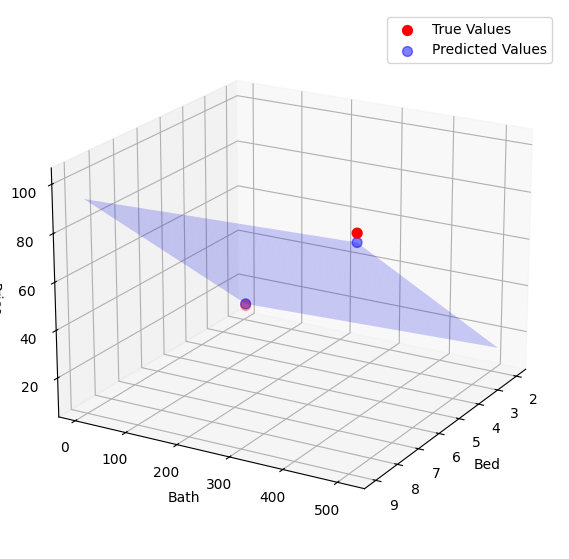

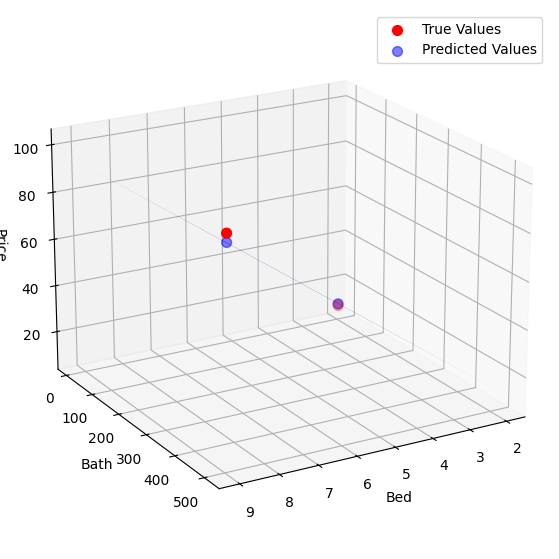

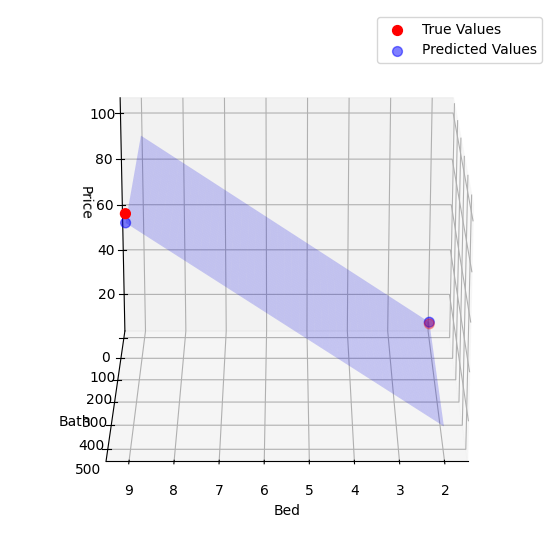

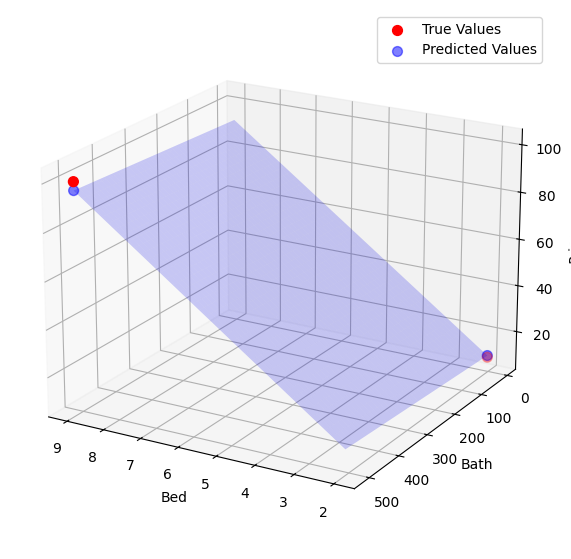

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def plot_3d(X, y, model, angle1, angle2):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Predictions for the grid with 125 points along each axis
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 125), 
                         np.linspace(X[:, 1].min(), X[:, 1].max(), 125))
    
    zz = model.predict(np.column_stack((xx.ravel(), yy.ravel()))).reshape(xx.shape)
    
    # Scatter plot of the true values in red
    ax.scatter(X[:, 0], X[:, 1], y, color='red', s=50, label='True Values')
    
    # Scatter plot of the predicted points on the regression plane in blue
    ax.scatter(X[:, 0], X[:, 1], model.predict(X), color='blue', s=50, alpha=0.5, label='Predicted Values')
    
    # Surface plot of the predicted plane in a transparent shade
    ax.plot_surface(xx, yy, zz, color='blue', alpha=0.2)
    
    ax.set_xlabel('Bed')
    ax.set_ylabel('Bath')
    ax.set_zlabel('Price')
    ax.legend()
    
    ax.view_init(angle1, angle2)
    plt.show()

# Sample data
x1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x2 = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
y = [5, 10, 20, 30, 40, 60, 70, 90, 100, 110]  # Sample target variable

X = np.column_stack((x1, x2))

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")    

# Plot from 4 different angles
angles = [(20, 30), (20, 60), (20, 90), (20, 120)]
for angle in angles:
    plot_3d(X_test, y_test, model, angle[0], angle[1])
